 `(Mohammad Reza Amiri 9926040)`
 `(Amir Hossein Ahmadi Ashtiani 9923501)`
 `(Mohammad Mahdi Norouzi 9923085)`

In [107]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [108]:
# Load the dataset
cancer_data = load_breast_cancer()

# Features (input data)
X = cancer_data.data

# Labels (output data)
y = cancer_data.target

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (569, 30)
y shape:  (569,)


### Explore Data:
The input data has a shape of `(569, 30)`, meaning there are 569 samples, each with 30 features.  
To create a perceptron, we need 30 weights, one for each feature.

### Initialization:
Determine the input size for the perceptron (which is 30 in this case) and initialize the weights and bias.

### Forward Pass:
Calculate the dot product between the input data and the weights, then add the bias.  
Pass the result through a sigmoid function to produce the output.

### Backward Pass:
First, we need to calculate the loss. A good option is to use the Mean Squared Error (MSE) loss function:

$$
\text{loss} = \frac{1}{2} (y_{\text{pred}} - y_{\text{label}})^2
$$

To update the weights and bias, we need the gradients of the loss with respect to the weights and bias. While using the chain rule is one option, a more efficient approach is to utilize a computational graph. The figure below illustrates this process.


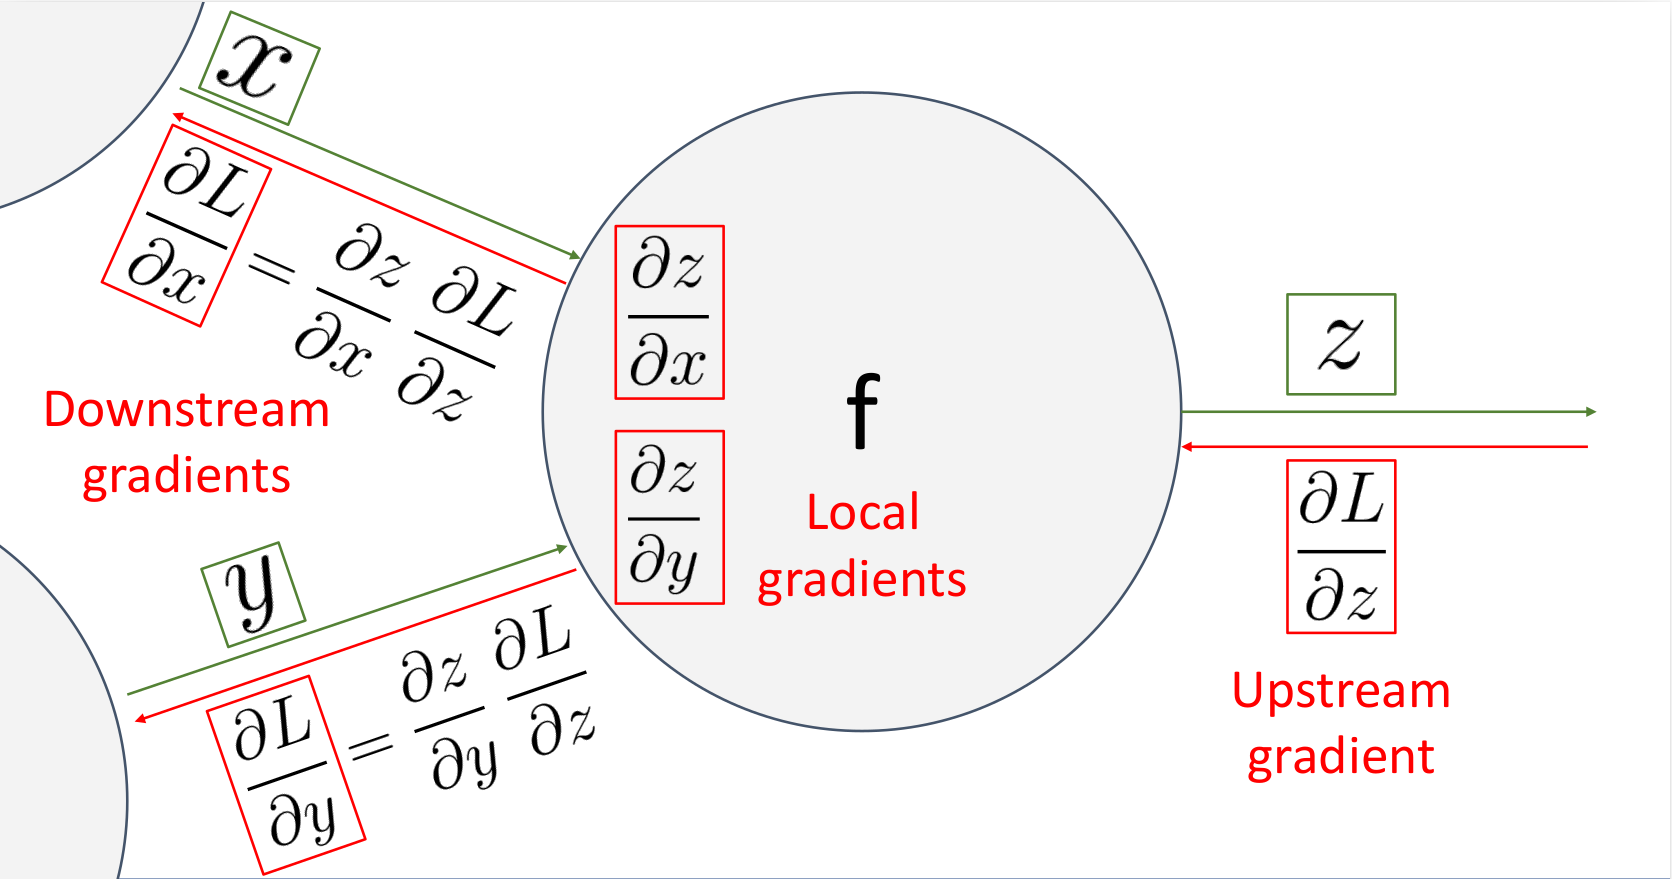

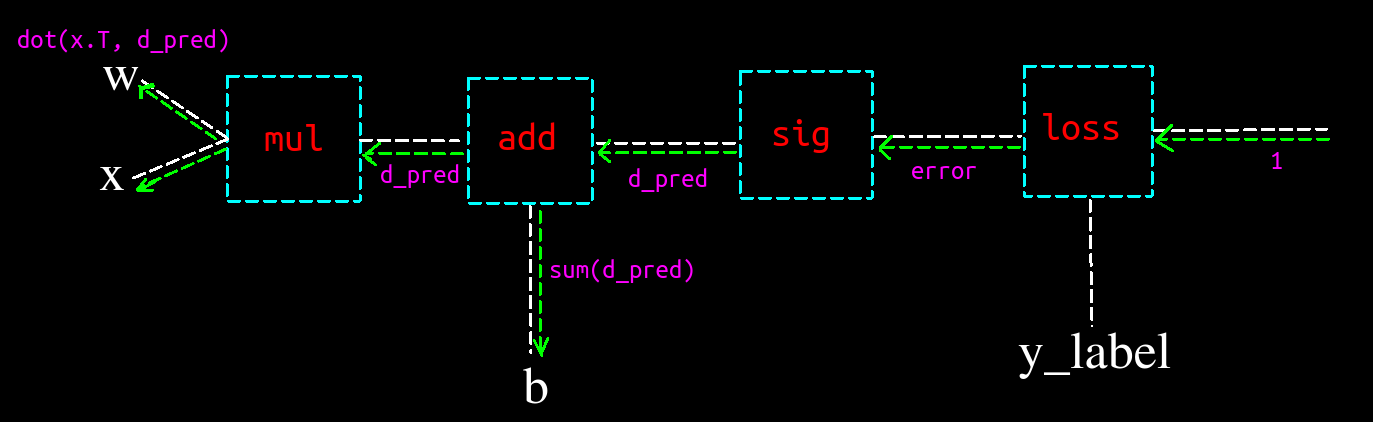

In [109]:
class Perceptron:
    def __init__(self, input_size=30, lr=0.01) -> None:
        self.input_size = input_size
        self.threshold = np.random.rand()
        self.w = np.random.rand(self.input_size, 1)
        self.lr = lr
        self.losses = []  # List to store loss at each epoch
        self.train_accuracies = []  # Track training accuracy
        self.test_accuracies = []  # Track test accuracy

    def forward(self, x):
        # Linear combination
        linear_output = np.dot(x, self.w) + self.threshold
        return self.sigmoid(linear_output)

    def sigmoid(self, out):
        return 1 / (1 + np.exp(-out))

    def sigmoid_derivative(self, out):
        # Derivative of the sigmoid function
        return out * (1 - out)
    
    def compute_loss(self, y_true, y_pred):
        # Squared loss: (1/2) * (y_pred - y_true)^2
        loss = 0.5 * np.mean((y_pred - y_true.reshape(-1, 1)) ** 2)
        return loss
    
    def accuracy(self, x, y_true):
        y_pred = self.predict(x).flatten()
        return np.mean(y_pred == y_true)

    def backward(self, x, y_true, y_pred):
        # Compute the error
        error = y_pred - y_true.reshape(-1, 1)

        # Derivative of sigmoid (for the output layer)
        d_pred = error * self.sigmoid_derivative(y_pred)

        # Update weights and threshold (bias)
        self.w -= self.lr * np.dot(x.T, d_pred)  # Gradient w.r.t weights
        self.threshold -= self.lr * np.sum(d_pred)  # Gradient w.r.t threshold (bias)

    def train(self, x_train, y_train, x_test, y_test, epochs=100):
        for epoch in range(epochs):
            y_pred_train = self.forward(x_train)
            
            # Compute training loss and store it
            train_loss = self.compute_loss(y_train, y_pred_train)
            self.losses.append(train_loss)
            
            # Calculate accuracy for training and test data
            train_accuracy = self.accuracy(x_train, y_train)
            test_accuracy = self.accuracy(x_test, y_test)
            
            # Store accuracies
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)
            
            # Update weights
            self.backward(x_train, y_train, y_pred_train)
    
    def predict(self, x):
        y_pred = self.forward(x)
        return (y_pred > 0.5).astype(int)  # Threshold at 0.5 to get binary output


In [110]:
# Plotting the loss and accuracy after training
def plot_loss_and_accuracy(perceptron):
    epochs = range(len(perceptron.losses))
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, perceptron.losses, label="Training Loss")
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, perceptron.train_accuracies, label="Training Accuracy", color='blue')
    plt.plot(epochs, perceptron.test_accuracies, label="Test Accuracy", color='green')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Display plots
    plt.tight_layout()
    plt.show()

In [111]:
# Normalize the data for faster convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Perceptron
perceptron1 = Perceptron(input_size=X_train.shape[1], lr=0.001)
perceptron2 = Perceptron(input_size=X_train.shape[1], lr=0.01)
perceptron3 = Perceptron(input_size=X_train.shape[1], lr=0.1)

# Train the Perceptron
perceptron1.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron2.train(X_train, y_train, X_test, y_test, epochs=50)
perceptron3.train(X_train, y_train, X_test, y_test, epochs=50)

# Predict on the test set
y_pred1 = perceptron1.predict(X_test)
y_pred2 = perceptron2.predict(X_test)
y_pred3 = perceptron3.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred1.flatten() == y_test)
print(f"Accuracy (lr:0.001): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred2.flatten() == y_test)
print(f"Accuracy (lr:0.01): {accuracy * 100:.2f}%")
accuracy = np.mean(y_pred3.flatten() == y_test)
print(f"Accuracy (lr:0.1): {accuracy * 100:.2f}%")

Accuracy (lr:0.001): 43.86%
Accuracy (lr:0.01): 97.37%
Accuracy (lr:0.1): 98.25%


lr: 0.001


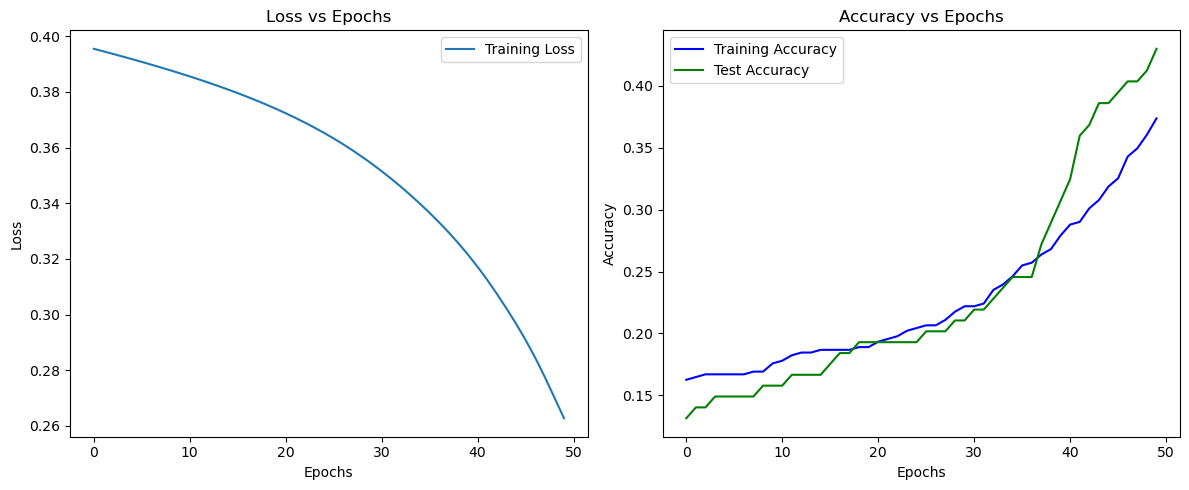

lr: 0.01


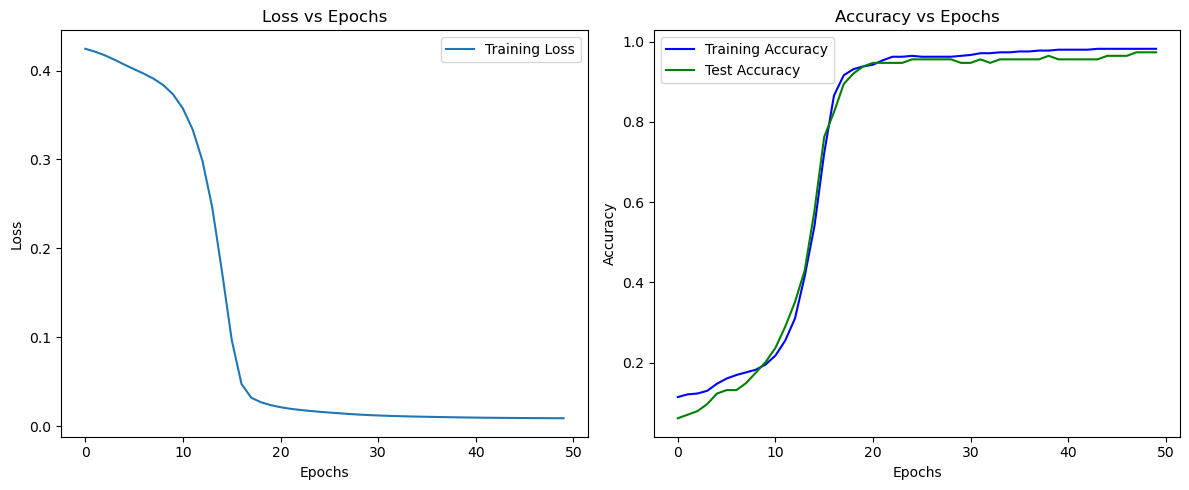

lr: 0.1


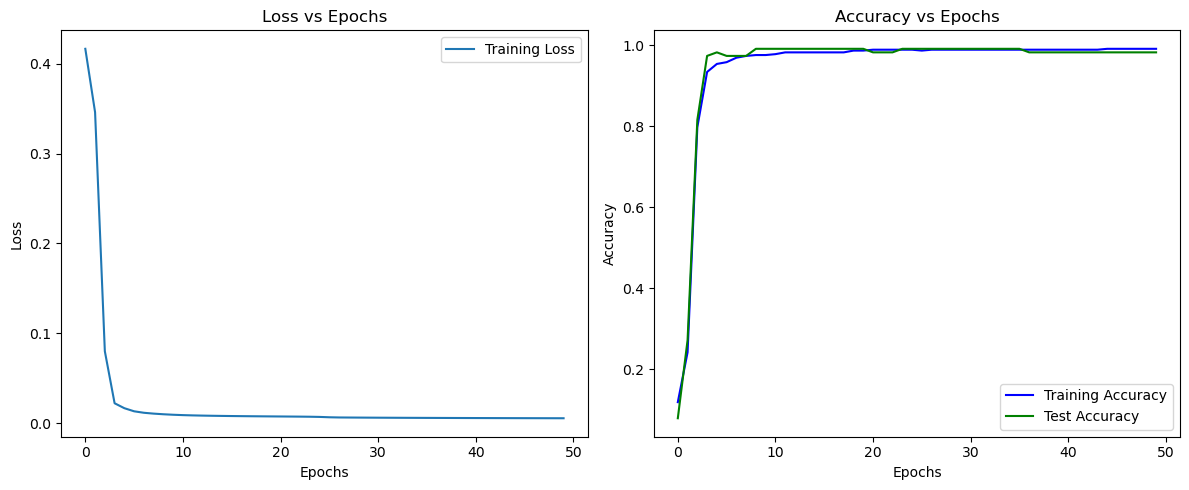

In [112]:
# Plot the loss curve
print('lr: 0.001')
plot_loss_and_accuracy(perceptron1)
print('lr: 0.01')
plot_loss_and_accuracy(perceptron2)
print('lr: 0.1')
plot_loss_and_accuracy(perceptron3)